In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
X_train,Y_train=loadlocal_mnist(images_path='train-images.idx3-ubyte',labels_path='train-labels.idx1-ubyte')
X_test,Y_test=loadlocal_mnist(images_path='t10k-images.idx3-ubyte',labels_path='t10k-labels.idx1-ubyte')


# Data Pre-processing

In [3]:

n_class=10
def preprocessing():
    
    x_train =X_train- X_train/255
    x_train = StandardScaler().fit_transform(x_train)
    x_test =X_test-X_test/255
    x_test = StandardScaler().fit_transform(x_test)
    y_train = np.eye(n_class)[Y_train.astype('int32')]
    y_train = y_train.T.reshape(n_class, len(Y_train))
    y_test = np.eye(n_class)[Y_test.astype('int32')]
    y_test = y_test.T.reshape(n_class, len(Y_test))
    x_train = x_train.T.reshape(784, len(x_train))
    x_test = x_test.T.reshape(784, len(x_test))
    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test=preprocessing()


# Loss and activation function

In [4]:
def compute_multiclass_loss(Y, predicted):
    L_sum = np.sum(np.multiply(Y, np.log(predicted)))
    m = Y.shape[1]
    L = -(1/m) * L_sum
    return L

def dtanh(x):
    return 1-(np.tanh(x)**2)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)
def relu(x):
        return x * (x > 0)
def drelu(x):
     return 1. * (x > 0)



# Training model

In [26]:
def training_model(x_train,y_train,n_iteration,lr):
    n_x = x_train.shape[0]
    n_h = 200
    m = len(x_train)
    learning_rate = lr

    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_class, n_h)
    b2 = np.zeros((n_class, 1))

    X = x_train
    Y = y_train
    n_iter=n_iteration
    costarr=np.empty([n_iter, 1])
    iterations=list(np.arange(1,n_iter+1))

    for i in range(n_iter):

        Z1 = np.matmul(W1,X) + b1
        A1 = sigmoid(Z1)
        #A1=np.tanh(Z1)
        #A1=relu(Z1)
        Z2 = np.matmul(W2,A1) + b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

        cost = compute_multiclass_loss(Y, A2)
        costarr[i]=cost
        if (i % 10 == 0):
            print("Epoch", i, "cost: ", cost)

        dZ2 = A2-Y
        dW2 = (1./m) * np.matmul(dZ2, A1.T)
        db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        #dZ1=dtanh(Z1)
        #dZ1=drelu(Z1)
        dW1 = (1./m) * np.matmul(dZ1, X.T)
        db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
    return W1,b1,W2,b2,costarr,iterations

# Plot

Epoch 0 cost:  13.308166891504724
Epoch 10 cost:  8.597176441722873
Epoch 20 cost:  3.3691401032824624
Epoch 30 cost:  1.2772848448372176
Epoch 40 cost:  1.069825967265562
Epoch 50 cost:  1.7230060593325154
Epoch 60 cost:  0.8618380699219229
Epoch 70 cost:  0.6671610392557318
Epoch 80 cost:  0.6481240483125309
Epoch 90 cost:  2.919343107332916
Epoch 100 cost:  0.6557414133385208
Epoch 110 cost:  0.5185284682710358
Epoch 120 cost:  0.46094708104729787
Epoch 130 cost:  0.4378446672327204
Epoch 140 cost:  1.2132722046526927
Epoch 150 cost:  1.055692201879765
Epoch 160 cost:  0.3967872643670815
Epoch 170 cost:  0.35617073284677386
Epoch 180 cost:  0.3286513615193763
Epoch 190 cost:  0.34553911809345544
Epoch 200 cost:  0.5993747768295421
Epoch 210 cost:  0.47651291060100714
Epoch 220 cost:  1.0499518526165745
Epoch 230 cost:  0.2979225090957005
Epoch 240 cost:  0.25953507964312234
Epoch 250 cost:  0.24168380254513347
Epoch 260 cost:  0.22823653693592827
Epoch 270 cost:  0.23245264401829013

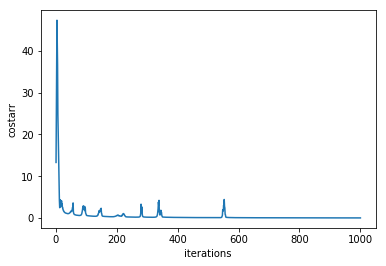

In [27]:
W1,b1,W2,b2,costarr,iterations=training_model(x_train,y_train,1000,0.1)
def plotcost(costarr,iterations):
    plt.xlabel("iterations")
    plt.ylabel("costarr")
    plt.plot(iterations,costarr)
    plt.show()
plotcost(costarr,iterations)


# Train Prediction

In [28]:
def train_prediction(W1,b1,W2,b2,x_train,y_train):
    Z1_t = np.matmul(W1, x_train) + b1
    A1_t = sigmoid(Z1_t)
    Z2_t = np.matmul(W2, A1_t) + b2
    A2_t = np.exp(Z2_t) / np.sum(np.exp(Z2_t), axis=0)

    predictions = np.argmax(A2_t, axis=0)
    labels = np.argmax(y_train, axis=0)
    accuracy = accuracy_score(labels,predictions)
    return accuracy
print(train_prediction(W1,b1,W2,b2,x_train,y_train))
    

0.99335


# Test Prediction

In [29]:
def test_prediction(W1,b1,W2,b2,x_test,y_test):
    Z1_t = np.matmul(W1, x_test) + b1
    A1_t = sigmoid(Z1_t)
    Z2_t = np.matmul(W2, A1_t) + b2
    A2_t = np.exp(Z2_t) / np.sum(np.exp(Z2_t), axis=0)

    predictions = np.argmax(A2_t, axis=0)
    labels = np.argmax(y_test, axis=0)
    accuracy = accuracy_score(labels,predictions)
    confusion_matrix_val=confusion_matrix(predictions, labels)
    classification_report_val=classification_report(predictions, labels)
    return accuracy,confusion_matrix_val,classification_report_val


In [32]:
accuracy,confusion_matrix,classification_report=test_prediction(W1,b1,W2,b2,x_test,y_test)
print("Test accuracy:",accuracy)
print("confusion_matrix:",confusion_matrix)
print("classification_report:",classification_report)

Test accuracy: 0.9093
confusion_matrix: [[ 940    0    8    5    2   11   10    1    9    8]
 [   0 1109    8    2    0    2    4    4    6    2]
 [   6    5  929   21   13    5   12   25   10    3]
 [   3    3   22  913    5   39    3   14   32   13]
 [   0    1   10    3  901    8    8   11   14   36]
 [  12    1    4   25    5  773   20    3   34   11]
 [  14    4   11    2    7    9  892    0    7    2]
 [   2    3   16    9    6    5    4  916    8   36]
 [   2    9   20   22   11   32    4    9  835   13]
 [   1    0    4    8   32    8    1   45   19  885]]
classification_report:               precision    recall  f1-score   support

           0       0.96      0.95      0.95       994
           1       0.98      0.98      0.98      1137
           2       0.90      0.90      0.90      1029
           3       0.90      0.87      0.89      1047
           4       0.92      0.91      0.91       992
           5       0.87      0.87      0.87       888
           6       0.93    